In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

import h5py
import numpy as np

from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [2]:
import phenom
import numpy as np

In [3]:
import puck

In [4]:
# wf = puck.Waveform(filename='../../data/q1a04t120_dP0_T_96_552.h5')
# wf = puck.Waveform(filename='../../data/q4a08t90dPm1D_T_96_384.h5')
wf = puck.Waveform(filename='data/q4a08t90dPm1D_T_96_384.h5')

In [5]:
wf.info

simname: q4a08t90dPm1D_T_96_384
filename: data/q4a08t90dPm1D_T_96_384.h5
eta: 0.16000039999600005
X1: [-7.27303692e-04  7.99961251e-01 -5.49319079e-03]
X2: [0. 0. 0.]
estimated remnant from fits:
final mass: 0.977977
final spin: 0.468547
ringdown freq: 0.074205
ringdown damp: 0.014009


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:26: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


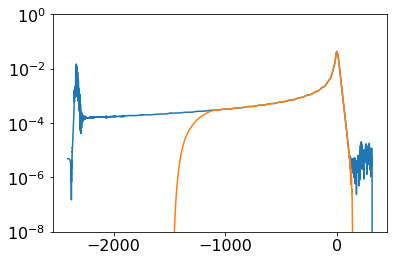

In [6]:
wf.compute_fft(t12=[-1500, -1000], t34=[100, 150], plot=True, take_pos_f=True, f_min=0.01, f_max=0.14)
# wf.compute_fft(t12=[-1000, -500], t34=[100, 101], plot=True, take_pos_f=True, f_min=0.01, f_max=0.3)

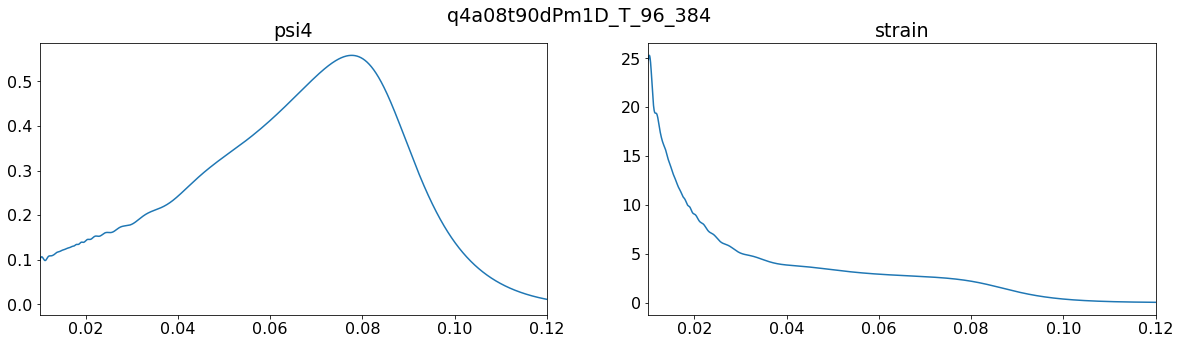

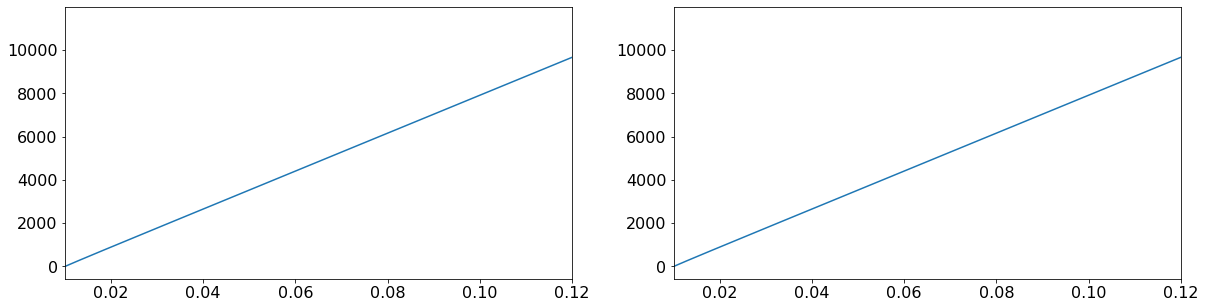

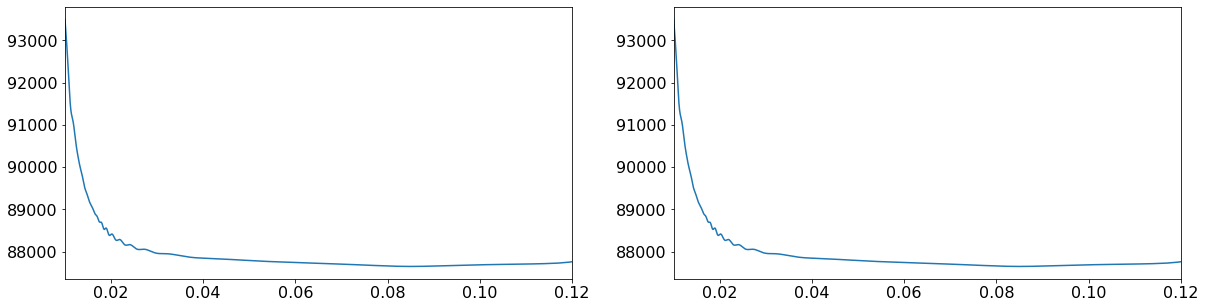

In [7]:
wf.plot_fd(xlim=[0.01,0.12])

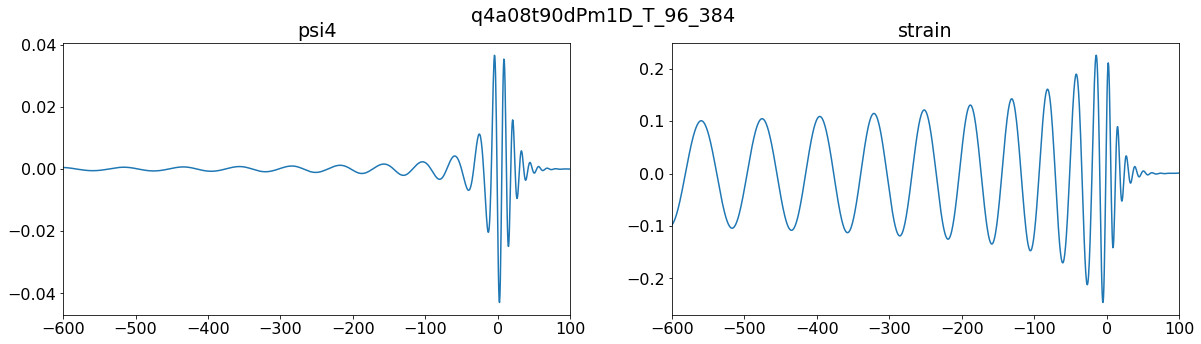

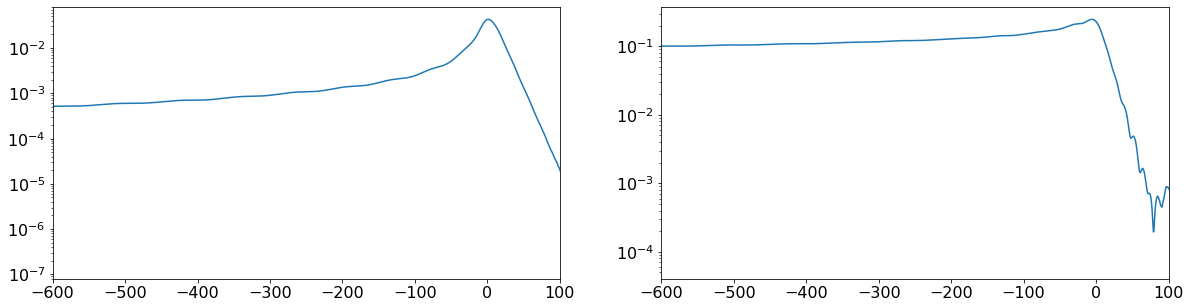

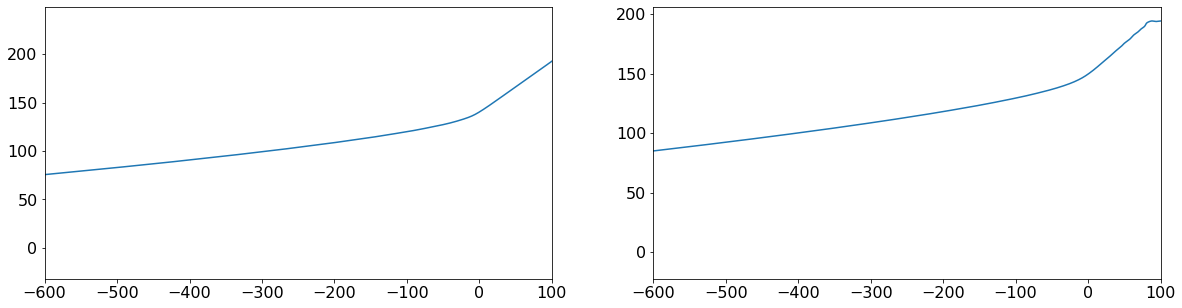

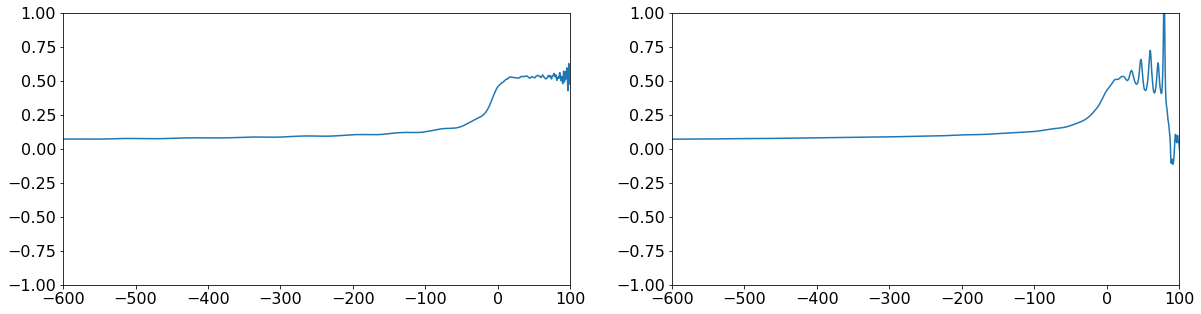

In [8]:
wf.plot_td(xlim=[-600,100])
# wf.plot_td()

# loop over all

In [9]:
import glob
all_files = glob.glob('data/*.h5')

In [10]:
len(all_files)

40

In [11]:
all_files

['data/q4a08t90dPm1D_T_96_384.h5',
 'data/q2a04t30dPm2_T_96_408.h5',
 'data/q8a08t90dP0_T_96_384.h5',
 'data/q4a04t90_T_96_360.h5',
 'data/q2_a10_a28_ph0_th120.h5',
 'data/q8a04t150dP9_T_96_360.h5',
 'data/q4a08t60dPm3dRm250_T_96_384.h5',
 'data/q2_a10_a28_ph0_th30.h5',
 'data/q2a04t120_T_96_408.h5',
 'data/q4a04t60dPm1.5D_T_96_360.h5',
 'data/q2a04t150_T_96_408.h5',
 'data/q4a08t30dPm5p5dRm47_T_96_360.h5',
 'data/q1a08t30dPm25_T_96_408.h5',
 'data/q2_a10_a28_ph0_th60.h5',
 'data/q8a08t120dP2_r03_T_96_360.h5',
 'data/q2a04t60dPm1_T_96_408.h5',
 'data/q4a08t120dP1_T_96_360.h5',
 'data/q1a08t150dP0_T_96_408.h5',
 'data/q1a08t60dPm1.5_T_96_408.h5',
 'data/q8a08t30dPm9.35_r0.5_T_96_360.h5',
 'data/q8a04t90dP0_T_96_360.h5',
 'data/q1a04t90_dP0_T_96_552.h5',
 'data/q8a08t60Ditm45dr075_96_360.h5',
 'data/q8a04t30dPm3_T_96_360.h5',
 'data/q8a04t120dPp1_T_96_360.h5',
 'data/q4a04t150_T_96_360.h5',
 'data/q4a04t30_T_96_360.h5',
 'data/q1a04t60_dPm1_T_96_552.h5',
 'data/q2_a10_a28_ph0_th150.h5',


In [12]:
all_files[38]

'data/q8a04t60D_dPm1.h5'

working: 0/40
info:
simname: q8a04t60D_dPm1
filename: data/q8a04t60D_dPm1.h5
eta: 0.09876538271585186
X1: [0.16242918 0.3473319  0.1139076 ]
X2: [0. 0. 0.]
estimated remnant from fits:
final mass: 0.988608
final spin: 0.390983
ringdown freq: 0.070492
ringdown damp: 0.014002




/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:26: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


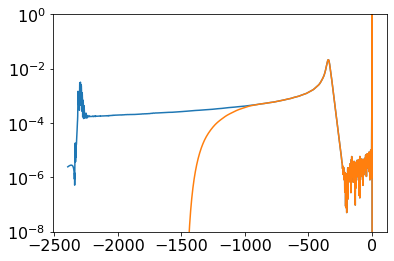

In [13]:
wfs = []
for i, f in enumerate([all_files[38]]):
    print(f"working: {i}/{len(all_files)}")
#     if "q8a08t150dP2_T_96_360" in f:
#         print("skipping: q8a08t150dP2_T_96_360")
#         continue
#     if "q8a04t60D_dPm1" in f:
#         print("skipping: q8a04t60D_dPm1")
#         continue
    wf = puck.Waveform(filename=f)
    print("info:")
    wf.info
    print("\n")
#     wf.plot_td(xlim=[-600,100])
#     wf.compute_fft(t12=[-1400, -1000], t34=[100, 150], plot=True, take_pos_f=True, f_min=0.025, f_max=0.14)
    wf.compute_fft(t12=[-1500, -800], t34=[100, 150], plot=True, take_pos_f=True, f_min=0.018, f_max=0.12)
    
    wfs.append(wf)

IndexError: list index out of range

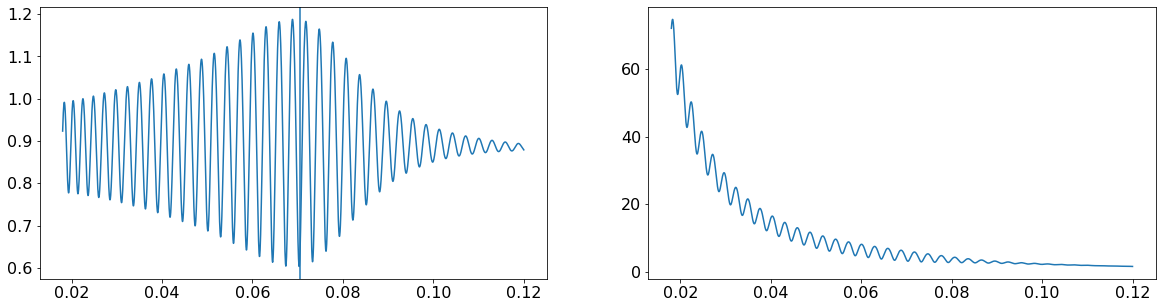

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].plot(wfs[0].fd['freqs'], wfs[0].fd['psi4']['amp'])
axes[1].plot(wfs[0].fd['freqs'], wfs[0].fd['strain']['amp'])
# for ax in axes:
#     ax.set_xlim(*xlim)

axes[0].axvline(wfs[0].fring)
axes[1].axvline(wfs[1].fring)

In [17]:
# for wf in wfs:
#     wf.compute_fft(t12=[-1500, -800], t34=[100, 150], plot=False, take_pos_f=True, f_min=0.018, f_max=0.12)

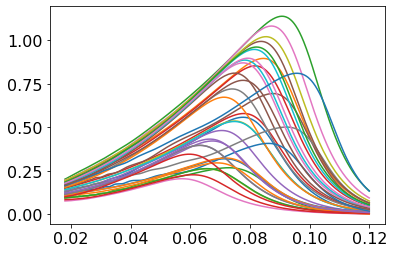

In [15]:
plt.figure()
for wf in wfs:
    plt.plot(wf.fd['freqs'], wf.fd['psi4']['amp'])


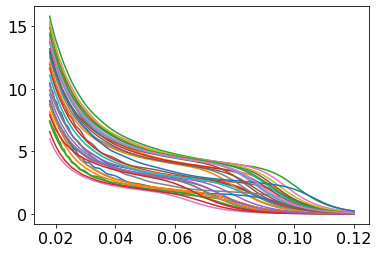

In [16]:
plt.figure()
for wf in wfs:
    plt.plot(wf.fd['freqs'], wf.fd['strain']['amp'])


In [18]:
def amp0(f, eta):
    """
    equation 18: (arxiv:1508.07253)
    """
    return np.sqrt((2 * eta)/(3 * np.pi**(1/3.))) * f**(-7/6.)

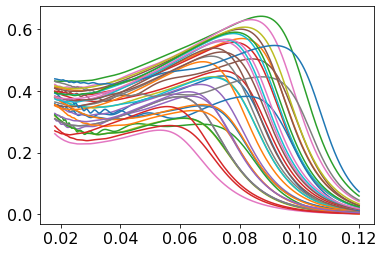

In [20]:
plt.figure()
for wf in wfs:
    plt.plot(wf.fd['freqs'], wf.fd['strain']['amp'] / amp0(wf.fd['freqs'], wf.eta))


# fit

In [21]:
from lmfit import Model, Parameter, report_fit

In [145]:
def ampmrd_func(f, gamma1, gamma2, gamma3, gamma4, fdamp, frd):
    """
    equation 19: (arxiv:1508.07253)
    
    added gamma4 - to modify frd
    """
    
    g3fd = gamma3*fdamp
    dfrd = f-(frd*(1+gamma4))
    
    part1 = gamma1 * g3fd / ( dfrd**2 + g3fd**2 )   
    part2 = np.exp(-gamma2 * dfrd / (gamma3*fdamp))

    return part1 * part2

In [330]:
1.2 / 1.15

1.0434782608695652

In [333]:
1/1.15

0.8695652173913044

In [334]:
1.2 * 0.87

1.044

In [339]:
def fit(wf):
    model = Model(ampmrd_func, independent_vars=['f'])
    x = wf.fd['freqs']
    y = wf.fd['strain']['amp'] / amp0(wf.fd['freqs'], wf.eta)

    
    # find true peak without using first part of data
    # as there can be a peak there sometimes
    mask = x>= 0.05
    true_peak = puck.get_peak_time(x[mask], y[mask])
    
    frd = wf.fring
    dpeak = frd - true_peak
    print(f"frd: {frd}")
    print(f"true_peak: {true_peak}")
    print(f"difference: {dpeak}")
    print("")
    
#     f_marker = frd
    f_marker = true_peak
    
#     f1 = f_marker/1.15
#     f1 = f_marker/1.05
    f1 = f_marker*0.95
    f2 = f_marker*1.2
    
    mask = (x>f1) & (x<f2)
    x = x[mask]
    y = y[mask]
    y = y
    
#     plt.figure()
#     plt.scatter(x, y)
#     plt.show()
#     plt.close()
    
    params = model.make_params()
    
    params['fdamp'].value = wf.fdamp
    params['fdamp'].vary=False

    params['frd'].value = wf.fring
    params['frd'].vary=False

    params['gamma1'].value = 1e-2
    params['gamma1'].min = 1e-4
    params['gamma1'].max = 1

    params['gamma2'].value = 0.8
    params['gamma2'].min = 0
    params['gamma2'].max = 5

    params['gamma3'].value = 1.4
    params['gamma3'].min = 1.
    params['gamma3'].max = 3.

    params['gamma4'].value = 0
    params['gamma4'].min = -1
    params['gamma4'].max = 1
#     params['gamma4'].vary = False
    params['gamma4'].vary = True

    result = model.fit(y, params, f=x)
    
    report_fit(result.params)
    
    result.plot()
    plt.axvline(wf.fring, c='k', ls='--')
    plt.axvline(true_peak, c='r', ls='--')
    plt.show()
    plt.close()
    
    return result

In [340]:
[wf.simname for wf in wfs].index('q8a08t60Ditm45dr075_96_360')

20

frd: 0.085761
true_peak: 0.08405583498777013
difference: 0.0017051650122298784

[[Variables]]
    gamma1:  0.00617901 +/- 3.7221e-06 (0.06%) (init = 0.01)
    gamma2:  0.94864307 +/- 3.5068e-04 (0.04%) (init = 0.8)
    gamma3:  1.19896424 +/- 4.3570e-04 (0.04%) (init = 1.4)
    gamma4:  0.11650767 +/- 5.6950e-05 (0.05%) (init = 0)
    fdamp:   0.013365 (fixed)
    frd:     0.085761 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.985
    C(gamma1, gamma3) =  0.970
    C(gamma1, gamma4) = -0.946
    C(gamma1, gamma2) = -0.929
    C(gamma3, gamma4) = -0.844
    C(gamma2, gamma3) = -0.814


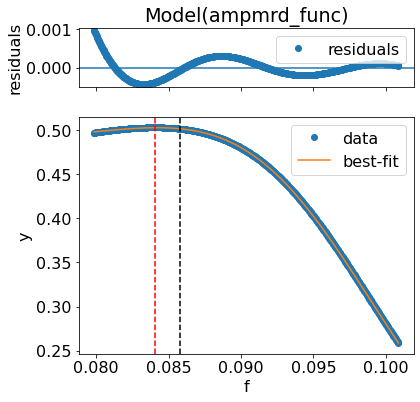

In [341]:
fit(wfs[5])

index: 0
working: q4a08t90dPm1D_T_96_384 

frd: 0.074205
true_peak: 0.07429729193848789
difference: -9.229193848789286e-05

[[Variables]]
    gamma1:  0.00601424 +/- 1.8604e-06 (0.03%) (init = 0.01)
    gamma2:  0.89217921 +/- 2.2929e-04 (0.03%) (init = 0.8)
    gamma3:  1.20368876 +/- 2.0834e-04 (0.02%) (init = 1.4)
    gamma4:  0.14172589 +/- 3.9326e-05 (0.03%) (init = 0)
    fdamp:   0.014009 (fixed)
    frd:     0.074205 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.994
    C(gamma1, gamma3) =  0.975
    C(gamma1, gamma4) = -0.965
    C(gamma1, gamma2) = -0.958
    C(gamma3, gamma4) = -0.885
    C(gamma2, gamma3) = -0.872


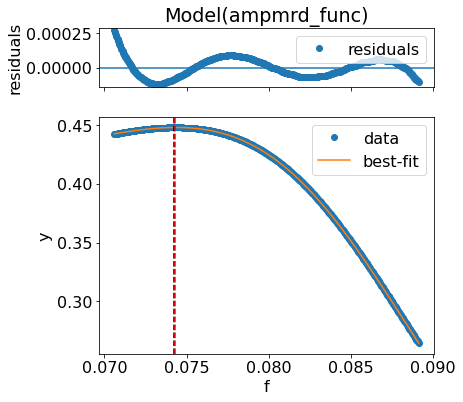

index: 1
working: q2a04t30dPm2_T_96_408 

frd: 0.090406
true_peak: 0.08083039153437778
difference: 0.00957560846562222

[[Variables]]
    gamma1:  0.00752342 +/- 3.2916e-06 (0.04%) (init = 0.01)
    gamma2:  0.92598526 +/- 2.8278e-04 (0.03%) (init = 0.8)
    gamma3:  1.27273068 +/- 3.2514e-04 (0.03%) (init = 1.4)
    gamma4:  0.02067263 +/- 4.2870e-05 (0.21%) (init = 0)
    fdamp:   0.013334 (fixed)
    frd:     0.090406 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.991
    C(gamma1, gamma3) =  0.974
    C(gamma1, gamma4) = -0.957
    C(gamma1, gamma2) = -0.946
    C(gamma3, gamma4) = -0.868
    C(gamma2, gamma3) = -0.850


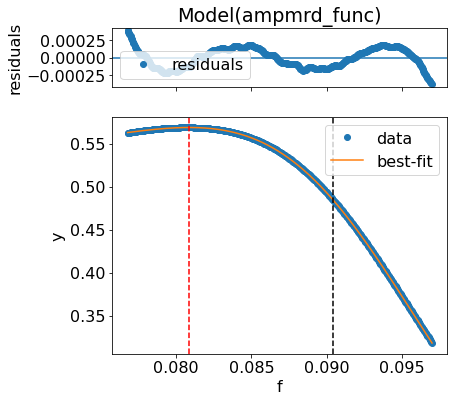

index: 2
working: q8a08t90dP0_T_96_384 

frd: 0.067809
true_peak: 0.06695321653447812
difference: 0.0008557834655218699

[[Variables]]
    gamma1:  0.00408484 +/- 6.6844e-06 (0.16%) (init = 0.01)
    gamma2:  0.96609038 +/- 5.7564e-04 (0.06%) (init = 0.8)
    gamma3:  1.31088949 +/- 0.00158517 (0.12%) (init = 1.4)
    gamma4:  0.19902511 +/- 1.0819e-04 (0.05%) (init = 0)
    fdamp:   0.0141 (fixed)
    frd:     0.067809 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma1, gamma3) =  0.994
    C(gamma2, gamma4) =  0.965
    C(gamma1, gamma2) = -0.952
    C(gamma2, gamma3) = -0.914
    C(gamma1, gamma4) = -0.860
    C(gamma3, gamma4) = -0.803


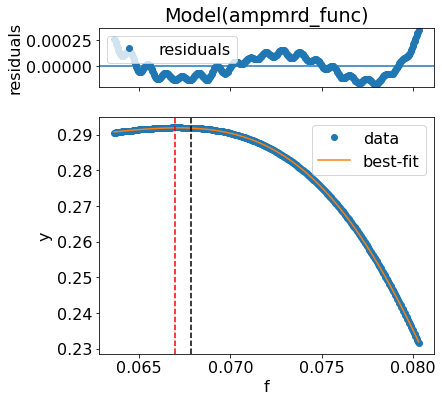

index: 3
working: q4a04t30dPm1.5D_T_96_360 

frd: 0.082634
true_peak: 0.07414424977112623
difference: 0.008489750228873771

[[Variables]]
    gamma1:  0.00631657 +/- 2.5909e-06 (0.04%) (init = 0.01)
    gamma2:  0.91043404 +/- 2.6961e-04 (0.03%) (init = 0.8)
    gamma3:  1.27271372 +/- 3.0797e-04 (0.02%) (init = 1.4)
    gamma4:  0.03272723 +/- 4.3147e-05 (0.13%) (init = 0)
    fdamp:   0.013568 (fixed)
    frd:     0.082634 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.994
    C(gamma1, gamma3) =  0.980
    C(gamma1, gamma4) = -0.961
    C(gamma1, gamma2) = -0.958
    C(gamma3, gamma4) = -0.890
    C(gamma2, gamma3) = -0.884


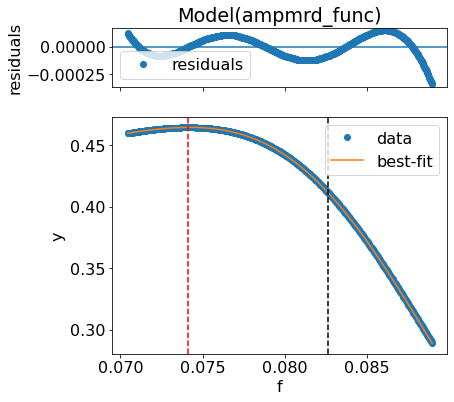

index: 4
working: q4a04t90_T_96_360 

frd: 0.074329
true_peak: 0.06682030916196358
difference: 0.00750869083803643

[[Variables]]
    gamma1:  0.00597382 +/- 2.7866e-06 (0.05%) (init = 0.01)
    gamma2:  0.87825925 +/- 3.3793e-04 (0.04%) (init = 0.8)
    gamma3:  1.26301252 +/- 3.4137e-04 (0.03%) (init = 1.4)
    gamma4:  0.04059475 +/- 5.7275e-05 (0.14%) (init = 0)
    fdamp:   0.014004 (fixed)
    frd:     0.074329 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.997
    C(gamma1, gamma3) =  0.985
    C(gamma1, gamma2) = -0.970
    C(gamma1, gamma4) = -0.969
    C(gamma2, gamma3) = -0.914
    C(gamma3, gamma4) = -0.912


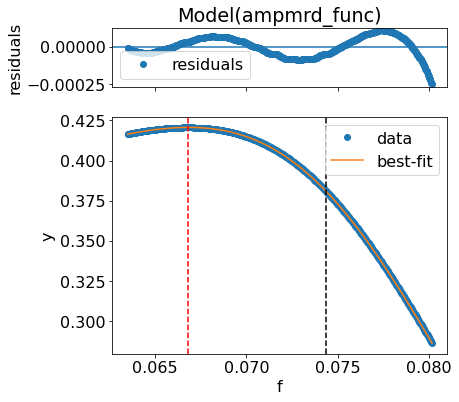

index: 5
working: q4a08t60dPm2_T_96_360 

frd: 0.085761
true_peak: 0.08405583498777013
difference: 0.0017051650122298784

[[Variables]]
    gamma1:  0.00617901 +/- 3.7221e-06 (0.06%) (init = 0.01)
    gamma2:  0.94864307 +/- 3.5068e-04 (0.04%) (init = 0.8)
    gamma3:  1.19896424 +/- 4.3570e-04 (0.04%) (init = 1.4)
    gamma4:  0.11650767 +/- 5.6950e-05 (0.05%) (init = 0)
    fdamp:   0.013365 (fixed)
    frd:     0.085761 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.985
    C(gamma1, gamma3) =  0.970
    C(gamma1, gamma4) = -0.946
    C(gamma1, gamma2) = -0.929
    C(gamma3, gamma4) = -0.844
    C(gamma2, gamma3) = -0.814


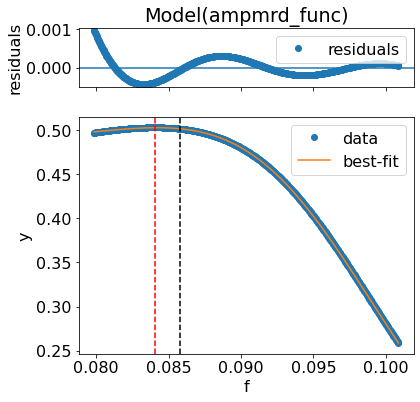

index: 6
working: q8a04t150dP9_T_96_360 

frd: 0.061532
true_peak: 0.053226579999740564
difference: 0.00830542000025944

[[Variables]]
    gamma1:  0.00410203 +/- 3.0773e-06 (0.08%) (init = 0.01)
    gamma2:  0.82425317 +/- 6.0127e-04 (0.07%) (init = 0.8)
    gamma3:  1.27457726 +/- 5.5794e-04 (0.04%) (init = 1.4)
    gamma4:  0.02061916 +/- 1.1384e-04 (0.55%) (init = 0)
    fdamp:   0.014258 (fixed)
    frd:     0.061532 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.998
    C(gamma1, gamma3) =  0.992
    C(gamma1, gamma2) = -0.983
    C(gamma1, gamma4) = -0.979
    C(gamma2, gamma3) = -0.952
    C(gamma3, gamma4) = -0.945


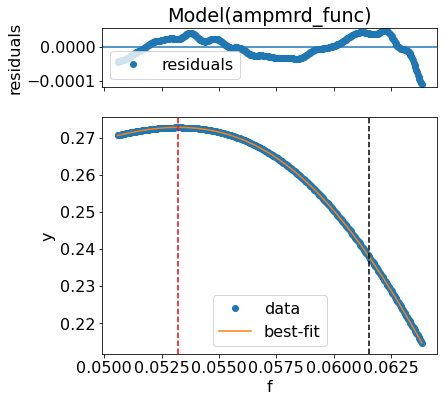

index: 7
working: q2a04t120_T_96_408 

frd: 0.080665
true_peak: 0.07025257483876107
difference: 0.010412425161238928

[[Variables]]
    gamma1:  0.00733593 +/- 3.1890e-06 (0.04%) (init = 0.01)
    gamma2:  0.87033321 +/- 3.2717e-04 (0.04%) (init = 0.8)
    gamma3:  1.27760420 +/- 3.1699e-04 (0.02%) (init = 1.4)
    gamma4:  0.00223855 +/- 5.1756e-05 (2.31%) (init = 0)
    fdamp:   0.013902 (fixed)
    frd:     0.080665 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.996
    C(gamma1, gamma3) =  0.982
    C(gamma1, gamma4) = -0.968
    C(gamma1, gamma2) = -0.967
    C(gamma3, gamma4) = -0.905
    C(gamma2, gamma3) = -0.902


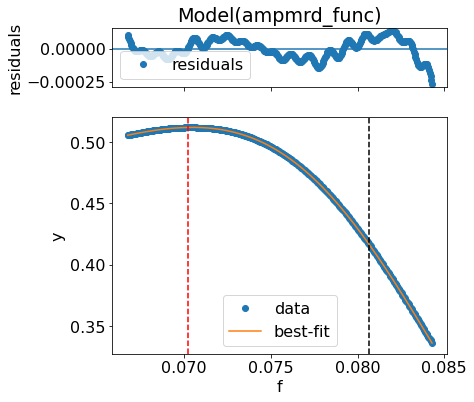

index: 8
working: q4a04t60dPm1D_T_96_360 

frd: 0.079137
true_peak: 0.07105757534262068
difference: 0.00807942465737932

[[Variables]]
    gamma1:  0.00616946 +/- 2.3652e-06 (0.04%) (init = 0.01)
    gamma2:  0.89638989 +/- 2.6420e-04 (0.03%) (init = 0.8)
    gamma3:  1.26660909 +/- 2.8344e-04 (0.02%) (init = 1.4)
    gamma4:  0.03534821 +/- 4.3156e-05 (0.12%) (init = 0)
    fdamp:   0.01377 (fixed)
    frd:     0.079137 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.995
    C(gamma1, gamma3) =  0.982
    C(gamma1, gamma4) = -0.965
    C(gamma1, gamma2) = -0.964
    C(gamma3, gamma4) = -0.900
    C(gamma2, gamma3) = -0.897


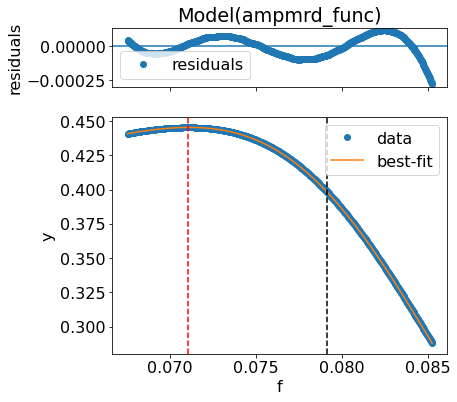

index: 9
working: q4a04t60dPm1.5D_T_96_360 

frd: 0.079372
true_peak: 0.07101430505634669
difference: 0.008357694943653307

[[Variables]]
    gamma1:  0.00612779 +/- 2.5388e-06 (0.04%) (init = 0.01)
    gamma2:  0.90033785 +/- 2.7876e-04 (0.03%) (init = 0.8)
    gamma3:  1.26887209 +/- 3.0986e-04 (0.02%) (init = 1.4)
    gamma4:  0.03323006 +/- 4.5612e-05 (0.14%) (init = 0)
    fdamp:   0.013757 (fixed)
    frd:     0.079372 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.995
    C(gamma1, gamma3) =  0.983
    C(gamma1, gamma4) = -0.964
    C(gamma1, gamma2) = -0.963
    C(gamma3, gamma4) = -0.900
    C(gamma2, gamma3) = -0.898


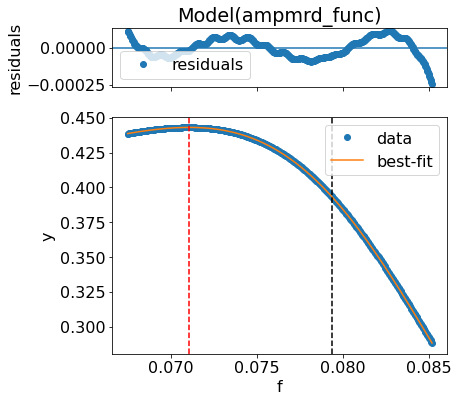

index: 10
working: q8a04t30_T_96_360 

frd: 0.077527
true_peak: 0.0671329346166441
difference: 0.010394065383355897

[[Variables]]
    gamma1:  0.00478955 +/- 1.3710e-06 (0.03%) (init = 0.01)
    gamma2:  0.92777658 +/- 1.5442e-04 (0.02%) (init = 0.8)
    gamma3:  1.28172516 +/- 2.3661e-04 (0.02%) (init = 1.4)
    gamma4:  0.01938701 +/- 2.5874e-05 (0.13%) (init = 0)
    fdamp:   0.013659 (fixed)
    frd:     0.077527 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.993
    C(gamma1, gamma3) =  0.989
    C(gamma1, gamma2) = -0.963
    C(gamma1, gamma4) = -0.950
    C(gamma2, gamma3) = -0.914
    C(gamma3, gamma4) = -0.896


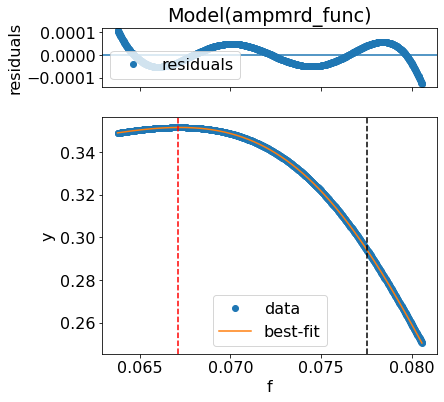

index: 11
working: q2a04t150_T_96_408 

frd: 0.078973
true_peak: 0.067686153929148
difference: 0.011286846070852008

[[Variables]]
    gamma1:  0.00719656 +/- 3.7569e-06 (0.05%) (init = 0.01)
    gamma2:  0.86030428 +/- 4.1402e-04 (0.05%) (init = 0.8)
    gamma3:  1.28399764 +/- 3.7451e-04 (0.03%) (init = 1.4)
    gamma4: -0.01340534 +/- 6.6061e-05 (0.49%) (init = 0)
    fdamp:   0.013982 (fixed)
    frd:     0.078973 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.997
    C(gamma1, gamma3) =  0.982
    C(gamma1, gamma4) = -0.972
    C(gamma1, gamma2) = -0.971
    C(gamma3, gamma4) = -0.912
    C(gamma2, gamma3) = -0.909


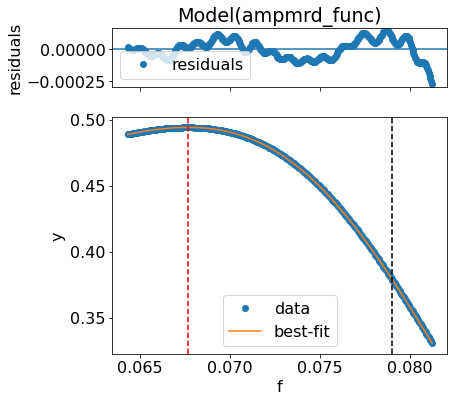

index: 12
working: q1a08t30dPm25_T_96_408 

frd: 0.097649
true_peak: 0.08724268586548298
difference: 0.010406314134517022

[[Variables]]
    gamma1:  0.00821393 +/- 3.7601e-06 (0.05%) (init = 0.01)
    gamma2:  0.93554535 +/- 2.9797e-04 (0.03%) (init = 0.8)
    gamma3:  1.27721957 +/- 3.3588e-04 (0.03%) (init = 1.4)
    gamma4:  0.01139256 +/- 4.2662e-05 (0.37%) (init = 0)
    fdamp:   0.012963 (fixed)
    frd:     0.097649 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.987
    C(gamma1, gamma3) =  0.964
    C(gamma1, gamma4) = -0.953
    C(gamma1, gamma2) = -0.934
    C(gamma3, gamma4) = -0.845
    C(gamma2, gamma3) = -0.809


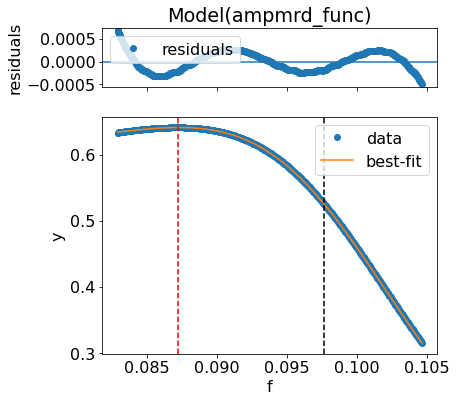

index: 13
working: q2a04t60dPm1_T_96_408 

frd: 0.086343
true_peak: 0.07799372007672242
difference: 0.00834927992327758

[[Variables]]
    gamma1:  0.00757117 +/- 3.2058e-06 (0.04%) (init = 0.01)
    gamma2:  0.90351394 +/- 2.9142e-04 (0.03%) (init = 0.8)
    gamma3:  1.26540351 +/- 3.0982e-04 (0.02%) (init = 1.4)
    gamma4:  0.03267808 +/- 4.4980e-05 (0.14%) (init = 0)
    fdamp:   0.013592 (fixed)
    frd:     0.086343 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.993
    C(gamma1, gamma3) =  0.976
    C(gamma1, gamma4) = -0.961
    C(gamma1, gamma2) = -0.954
    C(gamma3, gamma4) = -0.879
    C(gamma2, gamma3) = -0.867


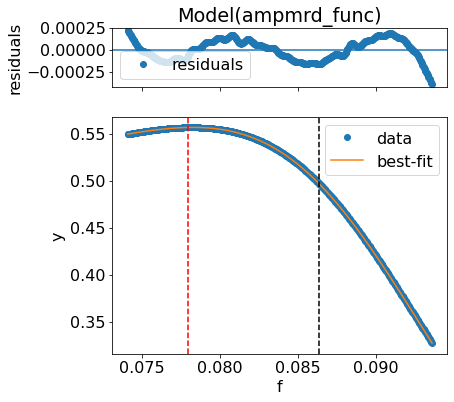

index: 14
working: q4a08t120dP1_T_96_360 

frd: 0.067665
true_peak: 0.06367957766352453
difference: 0.003985422336475475

[[Variables]]
    gamma1:  0.00549913 +/- 2.1291e-06 (0.04%) (init = 0.01)
    gamma2:  0.86206551 +/- 2.9397e-04 (0.03%) (init = 0.8)
    gamma3:  1.24437383 +/- 2.7671e-04 (0.02%) (init = 1.4)
    gamma4:  0.09134662 +/- 5.3362e-05 (0.06%) (init = 0)
    fdamp:   0.014242 (fixed)
    frd:     0.067665 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.997
    C(gamma1, gamma3) =  0.986
    C(gamma1, gamma2) = -0.974
    C(gamma1, gamma4) = -0.972
    C(gamma2, gamma3) = -0.923
    C(gamma3, gamma4) = -0.920


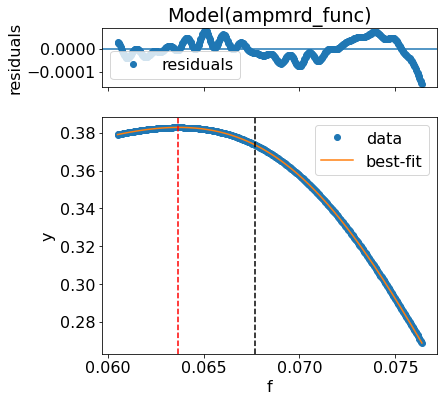

index: 15
working: q1a08t150dP0_T_96_408 

frd: 0.082917
true_peak: 0.07137933615451908
difference: 0.011537663845480925

[[Variables]]
    gamma1:  0.00772898 +/- 4.0779e-06 (0.05%) (init = 0.01)
    gamma2:  0.86847651 +/- 4.1760e-04 (0.05%) (init = 0.8)
    gamma3:  1.28146278 +/- 3.7384e-04 (0.03%) (init = 1.4)
    gamma4: -0.01461322 +/- 6.4319e-05 (0.44%) (init = 0)
    fdamp:   0.013874 (fixed)
    frd:     0.082917 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.996
    C(gamma1, gamma3) =  0.979
    C(gamma1, gamma4) = -0.970
    C(gamma1, gamma2) = -0.967
    C(gamma3, gamma4) = -0.901
    C(gamma2, gamma3) = -0.894


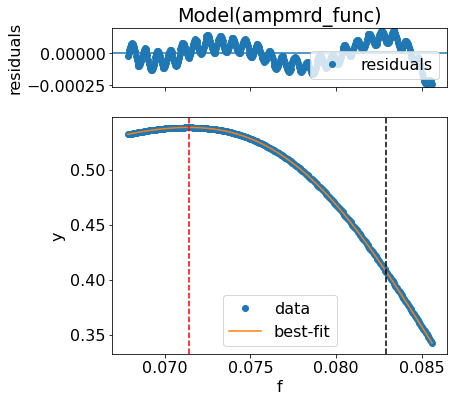

index: 16
working: q1a08t60dPm1.5_T_96_408 

frd: 0.093299
true_peak: 0.08378541760739014
difference: 0.009513582392609868

[[Variables]]
    gamma1:  0.00833126 +/- 3.4250e-06 (0.04%) (init = 0.01)
    gamma2:  0.91558392 +/- 2.8963e-04 (0.03%) (init = 0.8)
    gamma3:  1.27051547 +/- 2.9285e-04 (0.02%) (init = 1.4)
    gamma4:  0.01705085 +/- 4.2070e-05 (0.25%) (init = 0)
    fdamp:   0.013269 (fixed)
    frd:     0.093299 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.990
    C(gamma1, gamma3) =  0.966
    C(gamma1, gamma4) = -0.959
    C(gamma1, gamma2) = -0.944
    C(gamma3, gamma4) = -0.858
    C(gamma2, gamma3) = -0.831


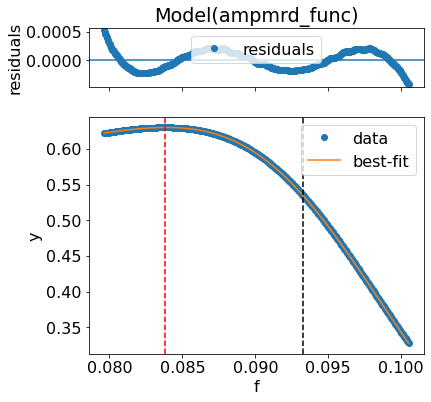

index: 17
working: q8a08t30dPm9.35_r0.5_T_96_360 

frd: 0.094354
true_peak: 0.08771926438615897
difference: 0.006634735613841022

[[Variables]]
    gamma1:  0.00515554 +/- 7.4892e-06 (0.15%) (init = 0.01)
    gamma2:  0.98657268 +/- 6.1435e-04 (0.06%) (init = 0.8)
    gamma3:  1.26026981 +/- 0.00123822 (0.10%) (init = 1.4)
    gamma4:  0.06961749 +/- 1.0007e-04 (0.14%) (init = 0)
    fdamp:   0.012361 (fixed)
    frd:     0.094354 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma1, gamma3) =  0.974
    C(gamma2, gamma4) =  0.972
    C(gamma1, gamma4) = -0.907
    C(gamma1, gamma2) = -0.886
    C(gamma3, gamma4) = -0.797
    C(gamma2, gamma3) = -0.763


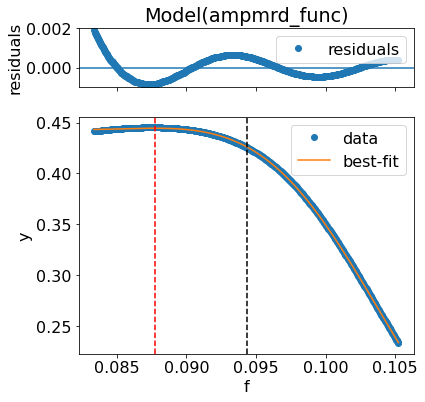

index: 18
working: q8a04t90dP0_T_96_360 

frd: 0.06767
true_peak: 0.061027338921786384
difference: 0.00664266107821361

[[Variables]]
    gamma1:  0.00433447 +/- 2.2193e-06 (0.05%) (init = 0.01)
    gamma2:  0.90785055 +/- 2.9245e-04 (0.03%) (init = 0.8)
    gamma3:  1.25308082 +/- 4.1157e-04 (0.03%) (init = 1.4)
    gamma4:  0.06999951 +/- 5.3358e-05 (0.08%) (init = 0)
    fdamp:   0.014105 (fixed)
    frd:     0.06767 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.995
    C(gamma1, gamma3) =  0.992
    C(gamma1, gamma2) = -0.972
    C(gamma1, gamma4) = -0.958
    C(gamma2, gamma3) = -0.934
    C(gamma3, gamma4) = -0.914


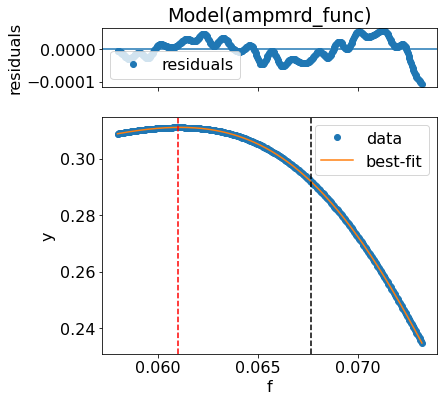

index: 19
working: q1a04t90_dP0_T_96_552 

frd: 0.088083
true_peak: 0.07777826215731833
difference: 0.010304737842681669

[[Variables]]
    gamma1:  0.00801045 +/- 3.4178e-06 (0.04%) (init = 0.01)
    gamma2:  0.90516547 +/- 2.9521e-04 (0.03%) (init = 0.8)
    gamma3:  1.27469314 +/- 3.1281e-04 (0.02%) (init = 1.4)
    gamma4:  0.00953312 +/- 4.4867e-05 (0.47%) (init = 0)
    fdamp:   0.013596 (fixed)
    frd:     0.088083 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.993
    C(gamma1, gamma3) =  0.976
    C(gamma1, gamma4) = -0.961
    C(gamma1, gamma2) = -0.955
    C(gamma3, gamma4) = -0.881
    C(gamma2, gamma3) = -0.869


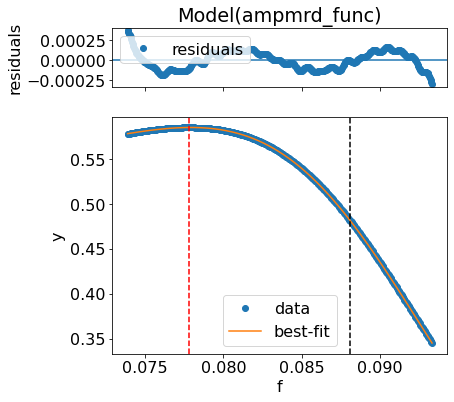

index: 20
working: q8a08t60Ditm45dr075_96_360 

frd: 0.078128
true_peak: 0.08219906411103602
difference: -0.004071064111036013

[[Variables]]
    gamma1:  0.00462296 +/- 4.4368e-06 (0.10%) (init = 0.01)
    gamma2:  0.95252795 +/- 5.1594e-04 (0.05%) (init = 0.8)
    gamma3:  1.16220016 +/- 6.9901e-04 (0.06%) (init = 1.4)
    gamma4:  0.20515654 +/- 9.1892e-05 (0.04%) (init = 0)
    fdamp:   0.013624 (fixed)
    frd:     0.078128 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.985
    C(gamma1, gamma3) =  0.974
    C(gamma1, gamma4) = -0.939
    C(gamma1, gamma2) = -0.926
    C(gamma3, gamma4) = -0.843
    C(gamma2, gamma3) = -0.821


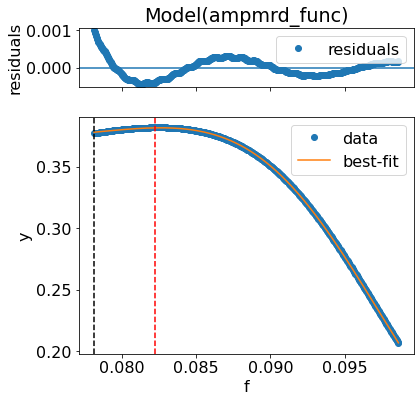

index: 21
working: q8a04t30dPm3_T_96_360 

frd: 0.069932
true_peak: 0.06726500134003278
difference: 0.0026669986599672096

[[Variables]]
    gamma1:  0.00481232 +/- 2.0647e-06 (0.04%) (init = 0.01)
    gamma2:  0.92853550 +/- 2.2929e-04 (0.02%) (init = 0.8)
    gamma3:  1.24072403 +/- 3.4457e-04 (0.03%) (init = 1.4)
    gamma4:  0.13223305 +/- 4.2431e-05 (0.03%) (init = 0)
    fdamp:   0.014024 (fixed)
    frd:     0.069932 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.993
    C(gamma1, gamma3) =  0.989
    C(gamma1, gamma2) = -0.962
    C(gamma1, gamma4) = -0.949
    C(gamma2, gamma3) = -0.913
    C(gamma3, gamma4) = -0.895


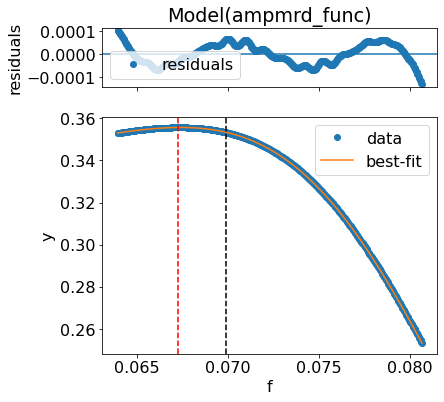

index: 22
working: q8a04t90_T_96_360 

frd: 0.067733
true_peak: 0.061276298470521205
difference: 0.006456701529478796

[[Variables]]
    gamma1:  0.00439494 +/- 1.4397e-06 (0.03%) (init = 0.01)
    gamma2:  0.89853806 +/- 1.9942e-04 (0.02%) (init = 0.8)
    gamma3:  1.26045029 +/- 2.5888e-04 (0.02%) (init = 1.4)
    gamma4:  0.06899879 +/- 3.6484e-05 (0.05%) (init = 0)
    fdamp:   0.014103 (fixed)
    frd:     0.067733 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.996
    C(gamma1, gamma3) =  0.991
    C(gamma1, gamma2) = -0.973
    C(gamma1, gamma4) = -0.963
    C(gamma2, gamma3) = -0.934
    C(gamma3, gamma4) = -0.919


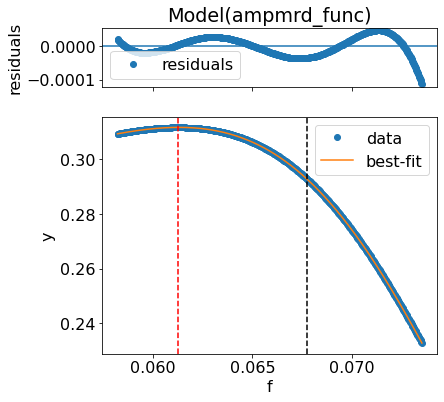

index: 23
working: q8a04t120dPp1_T_96_360 

frd: 0.065373
true_peak: 0.05647656662896213
difference: 0.00889643337103787

[[Variables]]
    gamma1:  0.00409718 +/- 1.7567e-06 (0.04%) (init = 0.01)
    gamma2:  0.88949023 +/- 2.6081e-04 (0.03%) (init = 0.8)
    gamma3:  1.25968851 +/- 3.4260e-04 (0.03%) (init = 1.4)
    gamma4:  0.03106029 +/- 4.7701e-05 (0.15%) (init = 0)
    fdamp:   0.014174 (fixed)
    frd:     0.065373 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.996
    C(gamma1, gamma3) =  0.993
    C(gamma1, gamma2) = -0.978
    C(gamma1, gamma4) = -0.965
    C(gamma2, gamma3) = -0.947
    C(gamma3, gamma4) = -0.929


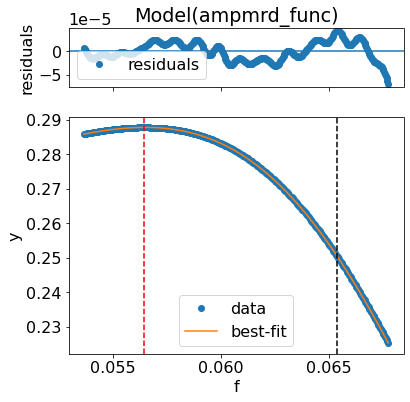

index: 24
working: q4a04t150_T_96_360 

frd: 0.067602
true_peak: 0.059445446629042165
difference: 0.00815655337095783

[[Variables]]
    gamma1:  0.00569405 +/- 3.2785e-06 (0.06%) (init = 0.01)
    gamma2:  0.83349750 +/- 4.7442e-04 (0.06%) (init = 0.8)
    gamma3:  1.27535792 +/- 4.1502e-04 (0.03%) (init = 1.4)
    gamma4:  0.02313590 +/- 8.4623e-05 (0.37%) (init = 0)
    fdamp:   0.014244 (fixed)
    frd:     0.067602 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.998
    C(gamma1, gamma3) =  0.988
    C(gamma1, gamma2) = -0.979
    C(gamma1, gamma4) = -0.977
    C(gamma2, gamma3) = -0.936
    C(gamma3, gamma4) = -0.932


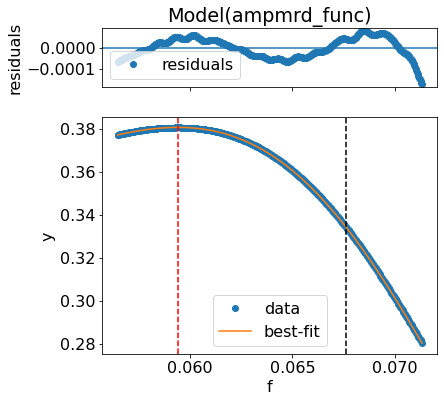

index: 25
working: q1a04t60_dPm1_T_96_552 

frd: 0.090625
true_peak: 0.08008337161128404
difference: 0.01054162838871596

[[Variables]]
    gamma1:  0.00807243 +/- 3.5455e-06 (0.04%) (init = 0.01)
    gamma2:  0.91415026 +/- 2.9744e-04 (0.03%) (init = 0.8)
    gamma3:  1.27595812 +/- 3.2285e-04 (0.03%) (init = 1.4)
    gamma4:  0.00821344 +/- 4.4478e-05 (0.54%) (init = 0)
    fdamp:   0.013442 (fixed)
    frd:     0.090625 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.992
    C(gamma1, gamma3) =  0.974
    C(gamma1, gamma4) = -0.959
    C(gamma1, gamma2) = -0.950
    C(gamma3, gamma4) = -0.873
    C(gamma2, gamma3) = -0.857


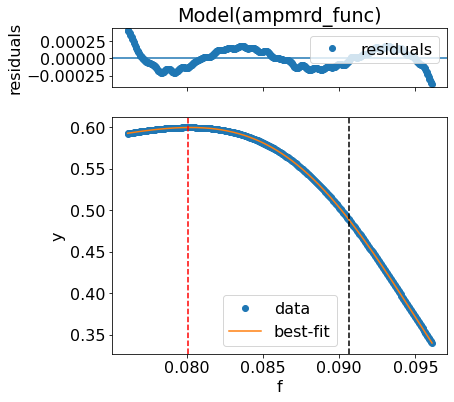

index: 26
working: q1a04t150_dP0_T_96_552 

frd: 0.084162
true_peak: 0.07425704091260762
difference: 0.009904959087392376

[[Variables]]
    gamma1:  0.00787357 +/- 3.7288e-06 (0.05%) (init = 0.01)
    gamma2:  0.88668630 +/- 3.6075e-04 (0.04%) (init = 0.8)
    gamma3:  1.27498204 +/- 3.3426e-04 (0.03%) (init = 1.4)
    gamma4:  0.00784435 +/- 5.5818e-05 (0.71%) (init = 0)
    fdamp:   0.013811 (fixed)
    frd:     0.084162 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.995
    C(gamma1, gamma3) =  0.976
    C(gamma1, gamma4) = -0.968
    C(gamma1, gamma2) = -0.962
    C(gamma3, gamma4) = -0.892
    C(gamma2, gamma3) = -0.881


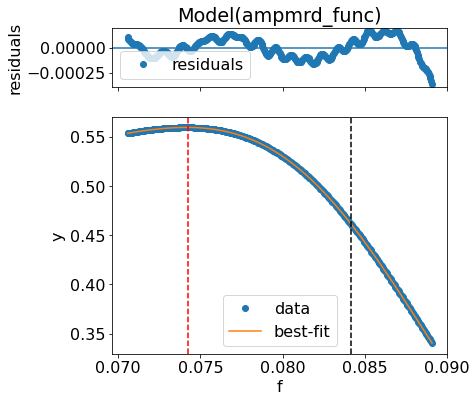

index: 27
working: q4a04t150_T_96_360.0.1.0 

frd: 0.067602
true_peak: 0.059445446629042165
difference: 0.00815655337095783

[[Variables]]
    gamma1:  0.00569405 +/- 3.2785e-06 (0.06%) (init = 0.01)
    gamma2:  0.83349750 +/- 4.7442e-04 (0.06%) (init = 0.8)
    gamma3:  1.27535792 +/- 4.1502e-04 (0.03%) (init = 1.4)
    gamma4:  0.02313590 +/- 8.4623e-05 (0.37%) (init = 0)
    fdamp:   0.014244 (fixed)
    frd:     0.067602 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.998
    C(gamma1, gamma3) =  0.988
    C(gamma1, gamma2) = -0.979
    C(gamma1, gamma4) = -0.977
    C(gamma2, gamma3) = -0.936
    C(gamma3, gamma4) = -0.932


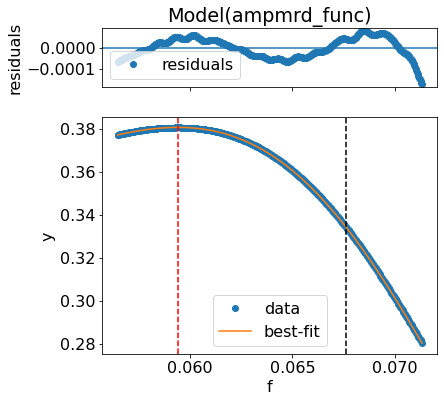

index: 28
working: q1a04t30_dPm2_T_96_552 

frd: 0.092657
true_peak: 0.08158486060166817
difference: 0.011072139398331834

[[Variables]]
    gamma1:  0.00802409 +/- 3.9453e-06 (0.05%) (init = 0.01)
    gamma2:  0.92674247 +/- 3.1183e-04 (0.03%) (init = 0.8)
    gamma3:  1.27779672 +/- 3.7066e-04 (0.03%) (init = 1.4)
    gamma4:  0.00602463 +/- 4.6488e-05 (0.77%) (init = 0)
    fdamp:   0.013311 (fixed)
    frd:     0.092657 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.990
    C(gamma1, gamma3) =  0.974
    C(gamma1, gamma4) = -0.955
    C(gamma1, gamma2) = -0.945
    C(gamma3, gamma4) = -0.867
    C(gamma2, gamma3) = -0.850


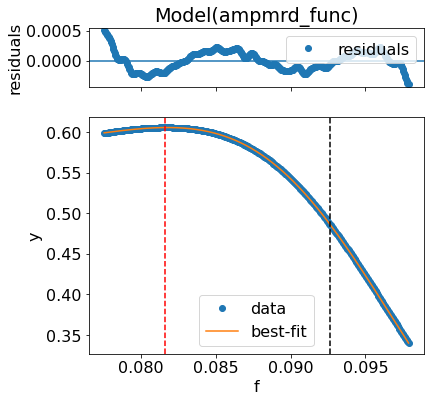

index: 29
working: q1a08t120dP0_T_96_408 

frd: 0.083594
true_peak: 0.07488533247118029
difference: 0.008708667528819714

[[Variables]]
    gamma1:  0.00803361 +/- 4.0255e-06 (0.05%) (init = 0.01)
    gamma2:  0.86909643 +/- 4.0665e-04 (0.05%) (init = 0.8)
    gamma3:  1.27106026 +/- 3.4553e-04 (0.03%) (init = 1.4)
    gamma4:  0.01910953 +/- 6.2442e-05 (0.33%) (init = 0)
    fdamp:   0.01384 (fixed)
    frd:     0.083594 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.995
    C(gamma1, gamma3) =  0.973
    C(gamma1, gamma4) = -0.969
    C(gamma1, gamma2) = -0.962
    C(gamma3, gamma4) = -0.889
    C(gamma2, gamma3) = -0.876


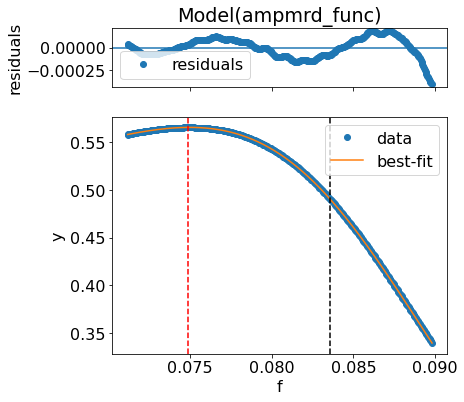

index: 30
working: q4a08t30dPm4_T_96_360 

frd: 0.0992
true_peak: 0.09159728184773543
difference: 0.00760271815226457

[[Variables]]
    gamma1:  0.00620064 +/- 6.5529e-06 (0.11%) (init = 0.01)
    gamma2:  0.97971510 +/- 5.0147e-04 (0.05%) (init = 0.8)
    gamma3:  1.23747045 +/- 8.4731e-04 (0.07%) (init = 1.4)
    gamma4:  0.05105260 +/- 7.6527e-05 (0.15%) (init = 0)
    fdamp:   0.012263 (fixed)
    frd:     0.0992 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.969
    C(gamma1, gamma3) =  0.965
    C(gamma1, gamma4) = -0.920
    C(gamma1, gamma2) = -0.883
    C(gamma3, gamma4) = -0.795
    C(gamma2, gamma3) = -0.735


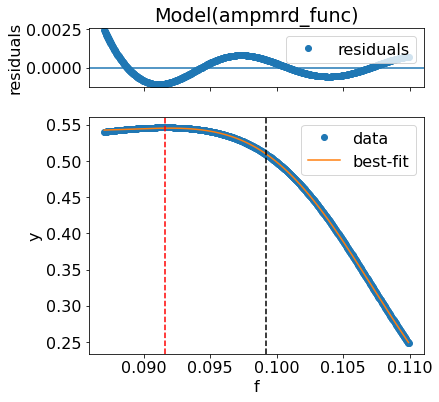

index: 31
working: q8a04t60_T_96_360 

frd: 0.066197
true_peak: 0.06447053044672639
difference: 0.0017264695532736157

[[Variables]]
    gamma1:  0.00455416 +/- 1.4356e-06 (0.03%) (init = 0.01)
    gamma2:  0.92836292 +/- 1.6471e-04 (0.02%) (init = 0.8)
    gamma3:  1.23093338 +/- 2.5411e-04 (0.02%) (init = 1.4)
    gamma4:  0.15303116 +/- 3.1542e-05 (0.02%) (init = 0)
    fdamp:   0.014151 (fixed)
    frd:     0.066197 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.993
    C(gamma1, gamma3) =  0.991
    C(gamma1, gamma2) = -0.965
    C(gamma1, gamma4) = -0.948
    C(gamma2, gamma3) = -0.922
    C(gamma3, gamma4) = -0.898


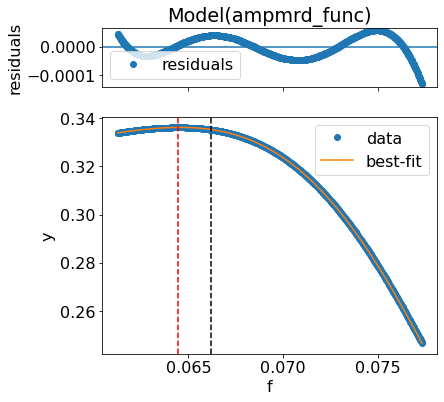

index: 32
working: q1a08t90dPm1_T_96_408 

frd: 0.088082
true_peak: 0.07840184000468928
difference: 0.009680159995310716

[[Variables]]
    gamma1:  0.00795406 +/- 4.0708e-06 (0.05%) (init = 0.01)
    gamma2:  0.92151599 +/- 3.2627e-04 (0.04%) (init = 0.8)
    gamma3:  1.27025607 +/- 3.8501e-04 (0.03%) (init = 1.4)
    gamma4:  0.02130283 +/- 5.0583e-05 (0.24%) (init = 0)
    fdamp:   0.013596 (fixed)
    frd:     0.088082 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.992
    C(gamma1, gamma3) =  0.978
    C(gamma1, gamma4) = -0.957
    C(gamma1, gamma2) = -0.952
    C(gamma3, gamma4) = -0.879
    C(gamma2, gamma3) = -0.868


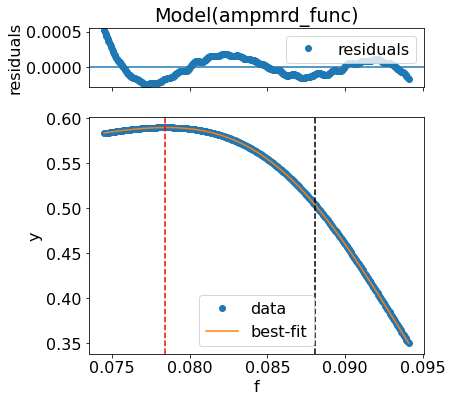

index: 33
working: q4a08t150_T_96_360 

frd: 0.065392
true_peak: 0.05565104731066613
difference: 0.009740952689333879

[[Variables]]
    gamma1:  0.00520211 +/- 3.6068e-06 (0.07%) (init = 0.01)
    gamma2:  0.84053665 +/- 5.3091e-04 (0.06%) (init = 0.8)
    gamma3:  1.27069318 +/- 5.1835e-04 (0.04%) (init = 1.4)
    gamma4:  0.00268710 +/- 9.6359e-05 (3.59%) (init = 0)
    fdamp:   0.014299 (fixed)
    frd:     0.065392 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.998
    C(gamma1, gamma3) =  0.991
    C(gamma1, gamma2) = -0.982
    C(gamma1, gamma4) = -0.977
    C(gamma2, gamma3) = -0.948
    C(gamma3, gamma4) = -0.940


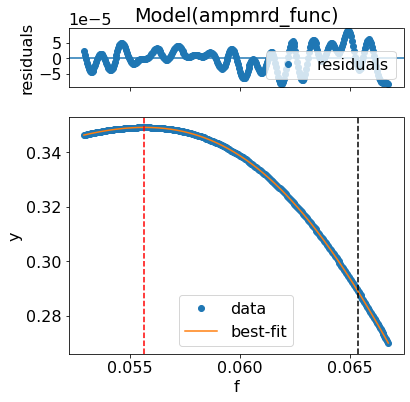

index: 34
working: q4a04t120dP0D_T_96_360 

frd: 0.07059
true_peak: 0.0627759926131305
difference: 0.007814007386869506

[[Variables]]
    gamma1:  0.00581872 +/- 2.9991e-06 (0.05%) (init = 0.01)
    gamma2:  0.85203173 +/- 4.0152e-04 (0.05%) (init = 0.8)
    gamma3:  1.27098228 +/- 3.7495e-04 (0.03%) (init = 1.4)
    gamma4:  0.03247069 +/- 6.9848e-05 (0.22%) (init = 0)
    fdamp:   0.01415 (fixed)
    frd:     0.07059 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.998
    C(gamma1, gamma3) =  0.987
    C(gamma1, gamma2) = -0.975
    C(gamma1, gamma4) = -0.973
    C(gamma2, gamma3) = -0.927
    C(gamma3, gamma4) = -0.924


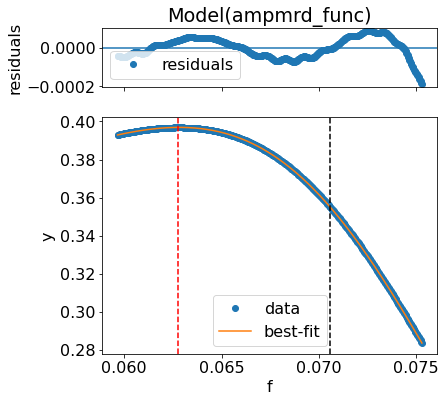

index: 35
working: q2a04t90dPm1_T_96_408 

frd: 0.083133
true_peak: 0.07382314529853046
difference: 0.009309854701469542

[[Variables]]
    gamma1:  0.00729407 +/- 2.9620e-06 (0.04%) (init = 0.01)
    gamma2:  0.89995169 +/- 2.7406e-04 (0.03%) (init = 0.8)
    gamma3:  1.27187856 +/- 3.0388e-04 (0.02%) (init = 1.4)
    gamma4:  0.02250565 +/- 4.3508e-05 (0.19%) (init = 0)
    fdamp:   0.013775 (fixed)
    frd:     0.083133 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.994
    C(gamma1, gamma3) =  0.981
    C(gamma1, gamma4) = -0.962
    C(gamma1, gamma2) = -0.961
    C(gamma3, gamma4) = -0.893
    C(gamma2, gamma3) = -0.890


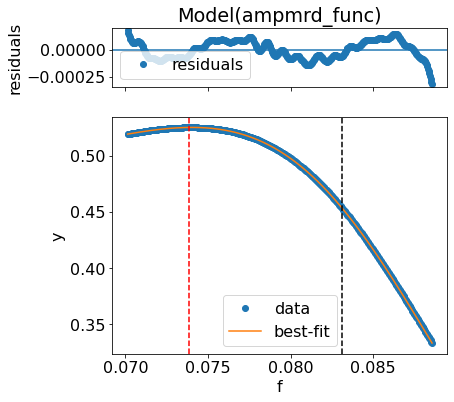

index: 36
working: q1a04t120_dP0_T_96_552 

frd: 0.085809
true_peak: 0.07576611596097743
difference: 0.010042884039022565

[[Variables]]
    gamma1:  0.00786882 +/- 3.6419e-06 (0.05%) (init = 0.01)
    gamma2:  0.89757396 +/- 3.3560e-04 (0.04%) (init = 0.8)
    gamma3:  1.27441112 +/- 3.3254e-04 (0.03%) (init = 1.4)
    gamma4:  0.00937479 +/- 5.1590e-05 (0.55%) (init = 0)
    fdamp:   0.013724 (fixed)
    frd:     0.085809 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma2, gamma4) =  0.994
    C(gamma1, gamma3) =  0.976
    C(gamma1, gamma4) = -0.965
    C(gamma1, gamma2) = -0.959
    C(gamma3, gamma4) = -0.889
    C(gamma2, gamma3) = -0.877


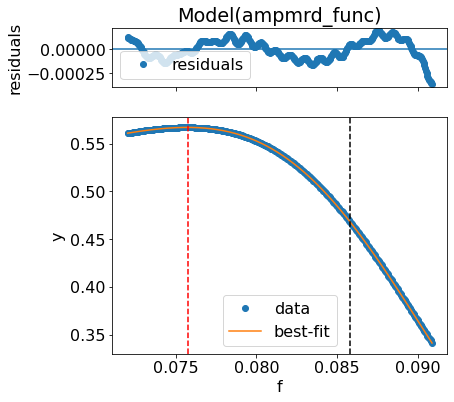

In [342]:
fits = []
for i, wf in enumerate(wfs):
    print(f"index: {i}")
    print(f"working: {wf.simname} \n")
    fits.append(fit(wf))

In [343]:
fits[0]

In [344]:
fits[0].params['gamma1'].value

0.006014243138752428

In [345]:
wfs[0].eta

0.16000039999600005

In [346]:
wfs[0].X1

array([-7.27303692e-04,  7.99961251e-01, -5.49319079e-03])

In [347]:
def cart_to_polar(x, y, z):
    """
    cartesian to spherical polar transformation
    returns: r, theta, phi
    """
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    theta = np.arctan2(hxy, z)
    phi = np.arctan2(y, x)
    return r, theta, phi


In [348]:
psf_coords = []
for wf in wfs:
    r, theta, phi = cart_to_polar(*wf.X1)
#     psf_coords.append([wf.eta, r, theta, phi])
#     psf_coords.append([wf.eta, r])
#     psf_coords.append([wf.eta, theta])
#     psf_coords.append([wf.eta, np.cos(theta)])
    psf_coords.append([wf.eta, np.cos(theta), r])
#     psf_coords.append([wf.eta, phi])
#     psf_coords.append([wf.eta, wf.X1[0]])
#     psf_coords.append([wf.eta, wf.X1[1]])
#     psf_coords.append([wf.eta, wf.X1[2]])
psf_coords = np.array(psf_coords)

In [349]:
psf_coords

array([[ 1.60000400e-01, -6.86665637e-03,  7.99980442e-01],
       [ 2.22222778e-01,  8.05327355e-01,  3.99991541e-01],
       [ 9.87654444e-02,  6.11707978e-03,  7.99985695e-01],
       [ 1.60000200e-01,  7.60655682e-01,  3.99995299e-01],
       [ 1.60000200e-01, -1.80827695e-04,  3.99994224e-01],
       [ 1.60000400e-01,  4.93752282e-01,  7.99979468e-01],
       [ 9.87653827e-02, -7.96287068e-01,  3.99997142e-01],
       [ 2.22222778e-01, -3.30999947e-01,  3.99992162e-01],
       [ 1.60000200e-01,  4.72087009e-01,  3.99994092e-01],
       [ 1.60000200e-01,  4.92715221e-01,  3.99994694e-01],
       [ 9.87653827e-02,  8.58323669e-01,  3.99997693e-01],
       [ 2.22222778e-01, -5.76191041e-01,  3.99992545e-01],
       [ 2.50000000e-01,  8.35069297e-01,  7.99971874e-01],
       [ 2.22222778e-01,  3.81258462e-01,  3.99991916e-01],
       [ 1.60000400e-01, -4.27339816e-01,  7.99980052e-01],
       [ 2.50000000e-01, -5.82720129e-01,  7.99971024e-01],
       [ 2.50000000e-01,  4.88244437e-01

In [350]:
params = fits[0].params

In [351]:
psf_data={}
for k in params.keys():
    if fits[0].params[k].vary:
        v = np.array([fits[i].params[k].value for i in range(len(fits))])
        psf_data.update({k:v})

In [352]:
psf_data.keys()

dict_keys(['gamma1', 'gamma2', 'gamma3', 'gamma4'])

In [353]:
psf_data['gamma1']

array([0.00601424, 0.00752342, 0.00408484, 0.00631657, 0.00597382,
       0.00617901, 0.00410203, 0.00733593, 0.00616946, 0.00612779,
       0.00478955, 0.00719656, 0.00821393, 0.00757117, 0.00549913,
       0.00772898, 0.00833126, 0.00515554, 0.00433447, 0.00801045,
       0.00462296, 0.00481232, 0.00439494, 0.00409718, 0.00569405,
       0.00807243, 0.00787357, 0.00569405, 0.00802409, 0.00803361,
       0.00620064, 0.00455416, 0.00795406, 0.00520211, 0.00581872,
       0.00729407, 0.00786882])

In [354]:
psf_coords[:,0]

array([0.1600004 , 0.22222278, 0.09876544, 0.1600002 , 0.1600002 ,
       0.1600004 , 0.09876538, 0.22222278, 0.1600002 , 0.1600002 ,
       0.09876538, 0.22222278, 0.25      , 0.22222278, 0.1600004 ,
       0.25      , 0.25      , 0.09876544, 0.09876538, 0.25      ,
       0.09876621, 0.09876538, 0.09876538, 0.09876538, 0.1600002 ,
       0.25      , 0.25      , 0.1600002 , 0.25      , 0.25      ,
       0.1600004 , 0.09876538, 0.25      , 0.16000228, 0.1600002 ,
       0.22222278, 0.25      ])

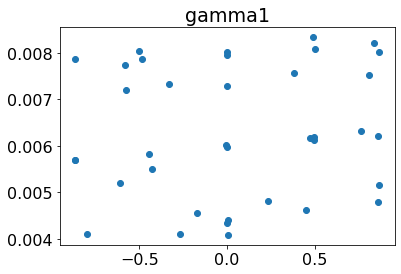

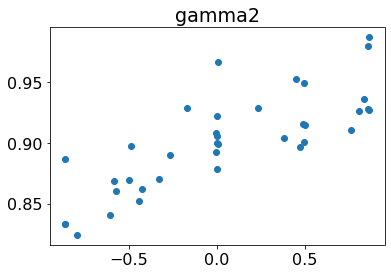

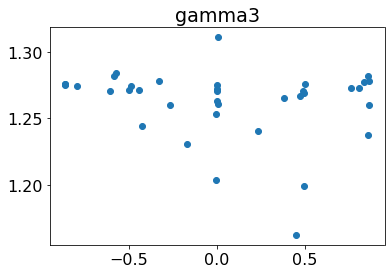

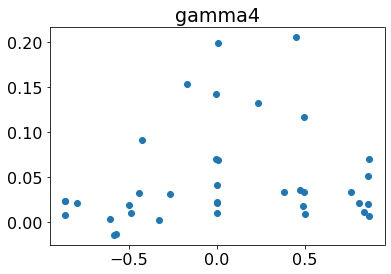

In [355]:
for k in psf_data.keys():
    plt.figure()
    plt.scatter(psf_coords[:,1], psf_data[k][:])
    plt.title(k)
    plt.show()
    plt.close()

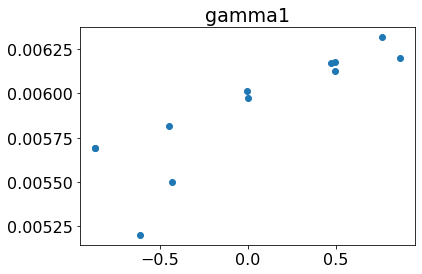

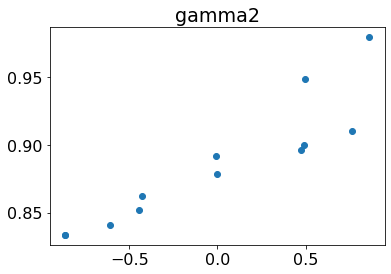

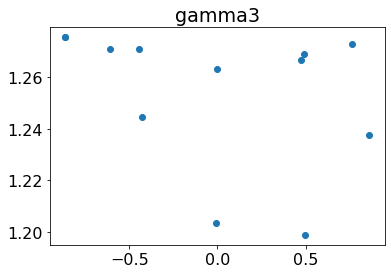

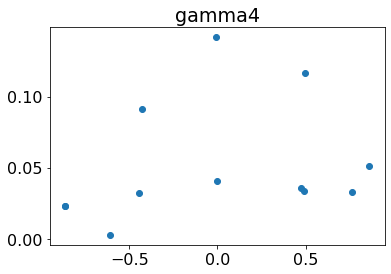

In [356]:
# eta_target = 0.0987
eta_target = 0.16
mask = (psf_coords[:,0] > eta_target-1e-3) & (psf_coords[:,0] < eta_target+1e-3)
for k in psf_data.keys():
    plt.figure()
    plt.scatter(psf_coords[mask,1], psf_data[k][mask])
    plt.title(k)
    plt.show()
    plt.close()

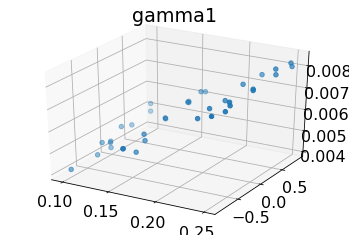

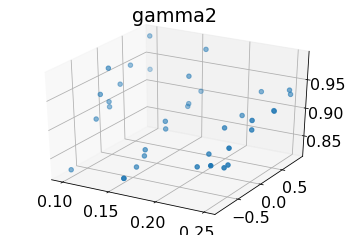

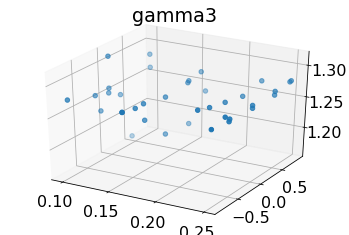

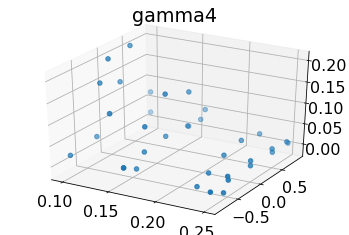

In [359]:
for k in psf_data.keys():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(psf_coords[:,0], psf_coords[:,1], psf_data[k])
    ax.set_title(k)
    fig.show()

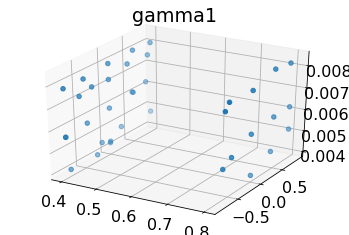

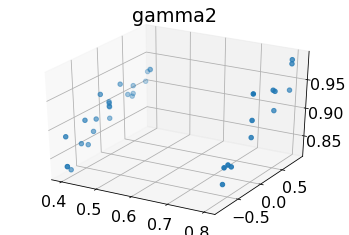

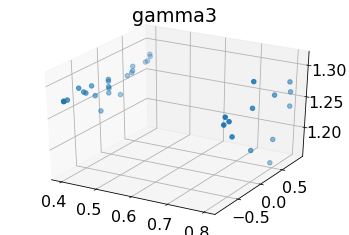

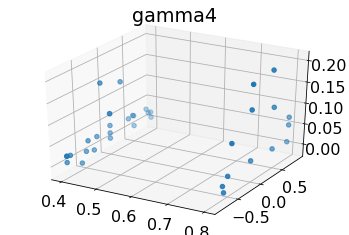

In [360]:
for k in psf_data.keys():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(psf_coords[:,2], psf_coords[:,1], psf_data[k])
    ax.set_title(k)
    fig.show()

In [294]:
# q, chi, costheta

In [241]:
pwd

'/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec'

In [238]:
# np.savetxt("psf_amp_x.txt", psf_coords)

In [228]:
# psf_y = np.array([psf_data[k] for k in psf_data.keys()]).T

In [235]:
# np.savetxt("psf_amp_y.txt", psf_y)

In [239]:
# psf_coords = np.loadtxt("psf_amp_x.txt")

In [236]:
# psf_y = np.loadtxt("psf_amp_y.txt")

In [230]:
# psf_y.shape

(37, 5)

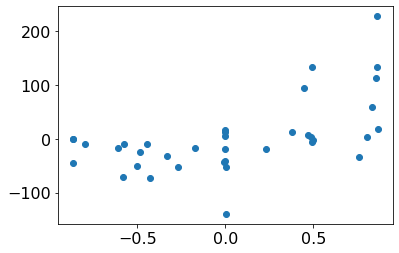

In [240]:
# plt.figure()
# plt.scatter(psf_coords[:,1], psf_y[:,2])

In [242]:
# psf_coords[0]

array([ 0.1600004 , -0.00686666,  0.79998044])